# Lecture \#9: Dynamic Time Warping

In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#x = np.array(np.random.normal(0,1,size=(1000,1))).reshape(-1, 1)
#y = np.array(np.random.normal(0,1,size=(1000,1))).reshape(-1, 1)
x = np.array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1,1)
y = np.array([1, 1, 1, 2, 2, 2, 2, 3, 2, 0]).reshape(-1,1)

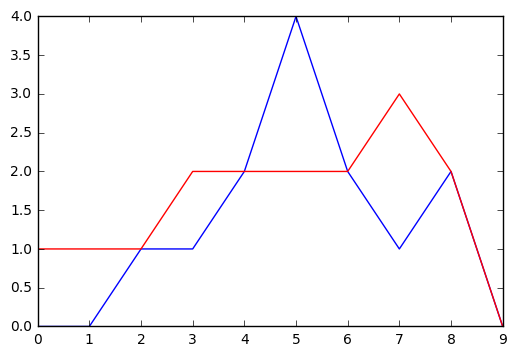

In [37]:
plt.plot(x,'b')
plt.plot(y,'r')
plt.show()

In [55]:
def dtw(x,y, d = lambda i,j: np.linalg.norm(i - j)):
    M = len(x)
    N = len(y)
    D = np.zeros((M,N))
    
    #C = np.zeros((len(x),len(y)))
    
    #for m in range(len(x)):
    #    for n in range(len(y)):
    #        C[m][n] = d(x[m],y[n])
       
    for m in range(len(x)):
        for n in range(len(y)):
            if (m == 0 and n == 0):
                D[m][n] = d(x[m],y[n])  
            elif m == 0 and n > 0:
                D[m][n] = d(x[m],y[n]) + D[m][n-1]
            elif m > 0 and n == 0:
                D[m][n] = d(x[m],y[n]) + D[m-1][n]
            else:
                D[m][n] = d(x[m],y[n]) + np.min([D[m-1][n], D[m][n-1], D[m-1][n-1]]) 

    p = [(M,N)]
    m = p[-1][0]
    n = p[-1][1]
    #while (m != 0 and m !=0):        
    #    options = [[D[m-1][n], D[m][n-1], D[m-1][n-1]],[(m-1,n),(m,n-1),(m-1,n-1)]]
    #    print(options)
    #    p.append(options[np.argmin(options[:,0])][1])
    #    m = p[-1][0]
    #    n = p[-1][1]
    #p.append((0,0))           
                
    optimal_cost = D[-1][-1]
    
    return [optimal_cost, p, D]

In [56]:
optimal_cost, local_cost, accumulative_cost = dtw(x,y)

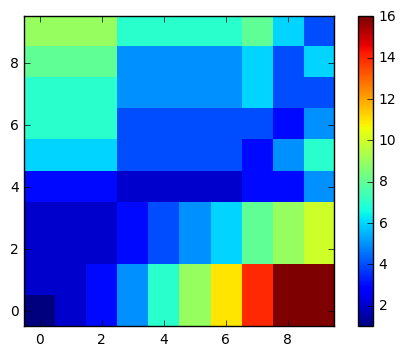

In [57]:
%matplotlib inline
plt.imshow(accumulative_cost,origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()